# Finding Heavy Traffic Indicators on I-94

## Project Intro

This project sets out to explore the variables that cause westbound traffic congestion on I-94. At the end of this project, we will have an understanding of what factors are strongly correlated with heavy traffic. The following image captures the location of the monitoring station where the data was collected (appoximately halfway between Minneapolis and St. Paul): 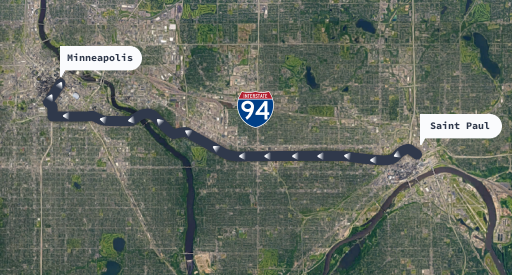

In [1]:
import pandas as pd

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

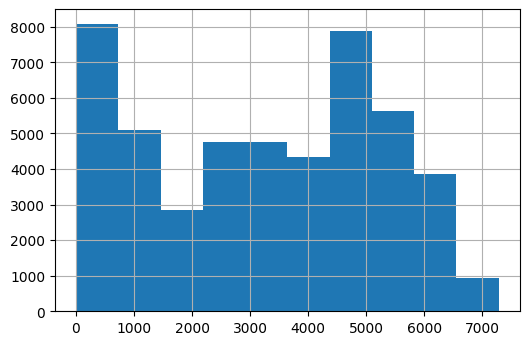

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].hist()
plt.show()

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram and distribution table from .describe(), it looks like the most frequent traffic volumes are around 1,000 and 5,000 cars. These correspond with the spikes in the histogram. The data also appears distibuted at around 3,380 (the median), with a maximum value at 7,280. As a working hypothesis, it's very likely that time of day (day or night) heavily influences traffic congestion - and this is something we should dig into.

## Traffic Volume: Day vs. Night

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [10]:
traffic_day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

In [11]:
traffic_day['date_time'].dt.hour.describe()

count    23877.000000
mean        12.431419
std          3.473405
min          7.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: date_time, dtype: float64

In [12]:
traffic_night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

In [13]:
traffic_night['date_time'].dt.hour.describe()

count    24327.000000
mean        10.384018
std          9.029227
min          0.000000
25%          2.000000
50%          5.000000
75%         20.000000
max         23.000000
Name: date_time, dtype: float64

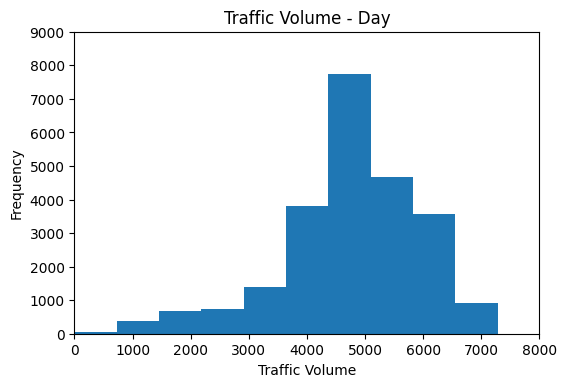

In [14]:
traffic_day['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume - Day')
plt.ylim([0,9000])
plt.xlim([0,8000])
plt.show()

In [15]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

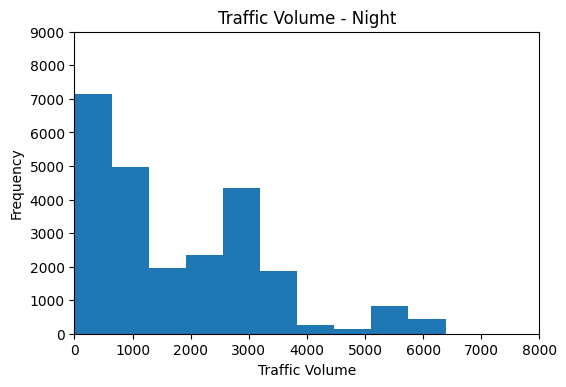

In [16]:
traffic_night['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume - Night')
plt.ylim([0,9000])
plt.xlim([0,8000])
plt.show()

In [17]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The day time traffic volume histogram shows a normalized distribution just under the 5,000 mark for traffic volume. Conversely, the night time traffic histogram showed a right-skewed (positive) distribution, with the majority of traffic volume under 3,000 cars. The largest spike in the night time histogram is under 1,000 cars and the second largest is at 3,000 cars. Since the traffic during the night is relatively light, this data could be excluded to focus on the indicators of heavy traffic.

## Time Indicators

In [18]:
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-18-e9f01761f546>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [19]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


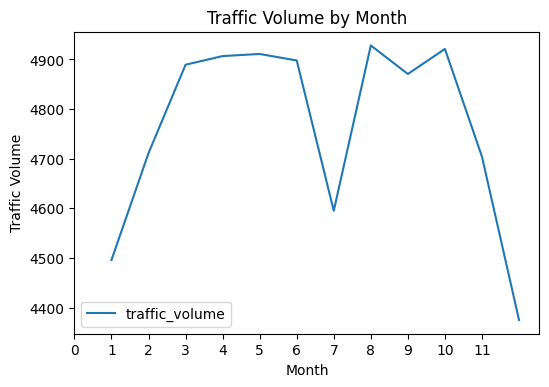

In [20]:
by_month.plot.line(y='traffic_volume')
plt.xticks(range(0, 12))
plt.title('Traffic Volume by Month')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.show()

From the line plot above, it looks like traffic volume hovers at around 4,900 except for the intervals between June and August and the range between October and March. These are points where the traffic volume goes down significantly. The June-August interval may be explained due to the summer season, where more people may take vacation, resulting in a reduction of congestion. The latter interval may be due to winter weather conditions.

In [21]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-21-f2e6eb4667c9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

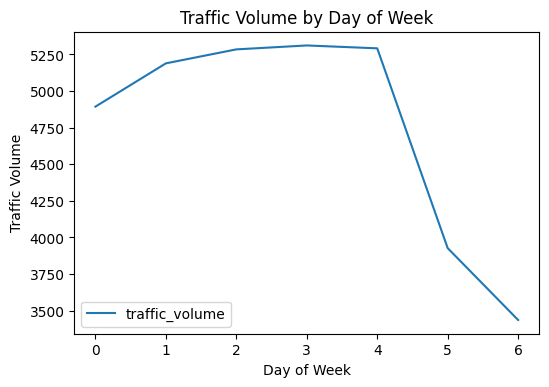

In [22]:
by_dayofweek.plot.line(y='traffic_volume')
plt.title('Traffic Volume by Day of Week')
plt.ylabel('Traffic Volume')
plt.xlabel('Day of Week')
plt.show()

It looks like the day of week influences traffic volume significantly. It looks like the work days are the busiest and the weekends are the least busy. Interestingly, it looks like Monday is a little less congested than the other work days.

In [23]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
work_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4]
weekend = traffic_day.copy()[traffic_day['dayofweek'] > 4]
by_hour_work = work_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_work['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-23-5ace1d5a52f4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



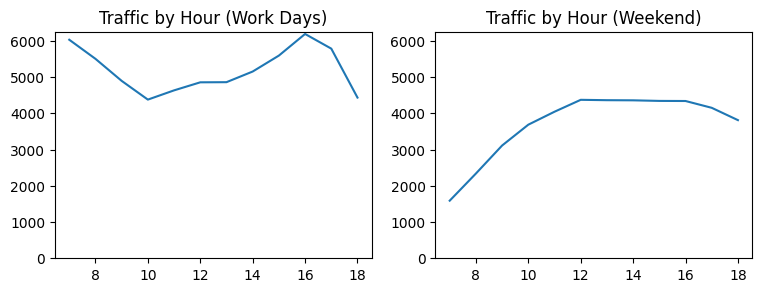

In [24]:
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.plot(by_hour_work['traffic_volume'])
plt.ylim((0, 6250))
plt.title('Traffic by Hour (Work Days)')
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim((0, 6250))
plt.title('Traffic by Hour (Weekend)')
plt.show()

Fom the line plots, we can tell that the hourly traffic differs significantly between work days and the weekend. The beginning and end of the work day (rush hours) have much more congestion, whereas the middle of the day is much more congested on the weekend. More specifically, the early morning rush hour appears to be between 7 to 8am. The afternoon rush hour peaks at about 4pm and remains somewhat elevated until 5pm. Also, the overall magnitude of the traffic congestion during the weekend is much lower than during work days.

## Weather Indicators

In [25]:
traffic_day.corr()[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

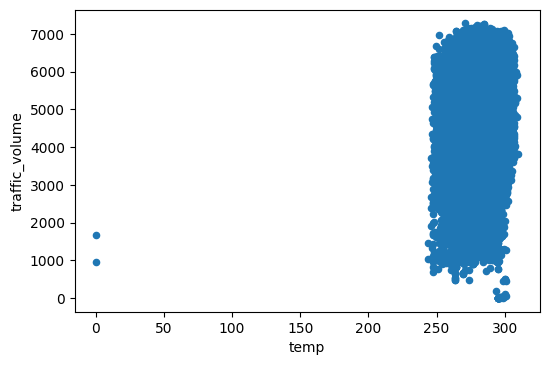

In [26]:
traffic_day.plot.scatter(x='temp', y='traffic_volume')

In [27]:
traffic_day['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

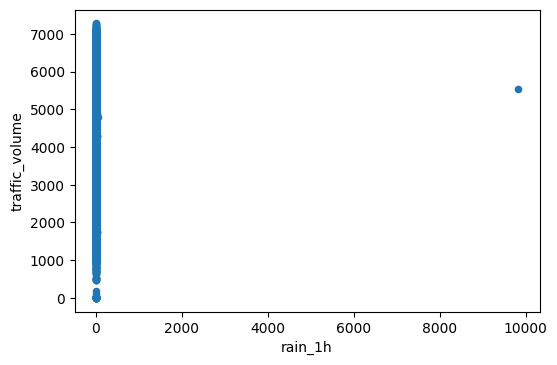

In [28]:
traffic_day.plot.scatter(x='rain_1h', y='traffic_volume')

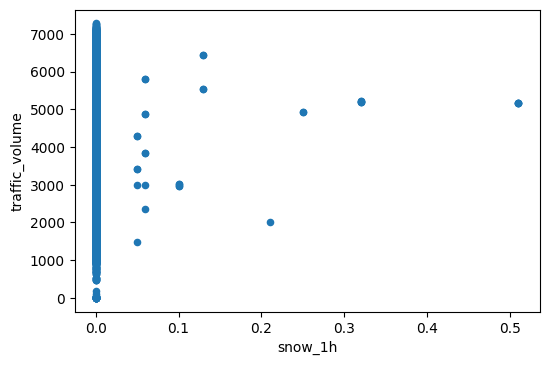

In [29]:
traffic_day.plot.scatter(x='snow_1h', y='traffic_volume')

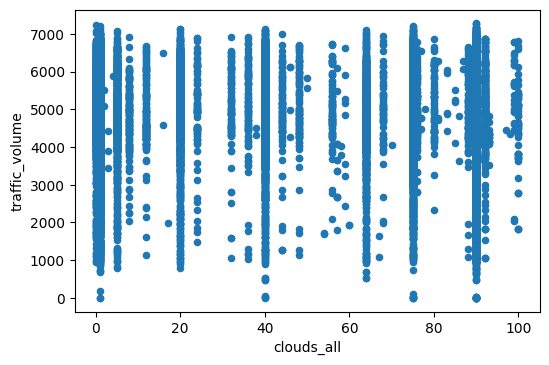

In [30]:
traffic_day.plot.scatter(x='clouds_all', y='traffic_volume')

It looks like most of the weather factors are poor predictors of heavy traffic, except for *snow_1h*. If we can remove the data with no snow, it looks like snow accumulation is logarithmically correlated with traffic congestion.

In [34]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

In [37]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626


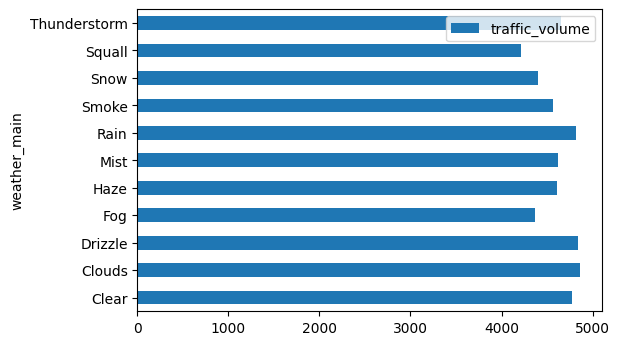

In [39]:
by_weather_main.plot.barh(y='traffic_volume')

From the traffic volume assocaited with each weather_main type, it looks like the highest volume of traffic occurs during rain, drizzle, and clouds - each falling just short of 5,000 cars.

In [44]:
by_weather_description[by_weather_description['traffic_volume'] > 5000]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
light rain and snow,275.607500,0.3175,0.0,83.500000,5579.750000,7.5,1.25,15.000000
proximity thunderstorm with drizzle,287.913333,0.2600,0.0,87.833333,5121.833333,8.5,2.50,12.166667
shower snow,268.680000,0.0000,0.0,90.000000,5664.000000,3.0,4.00,7.000000


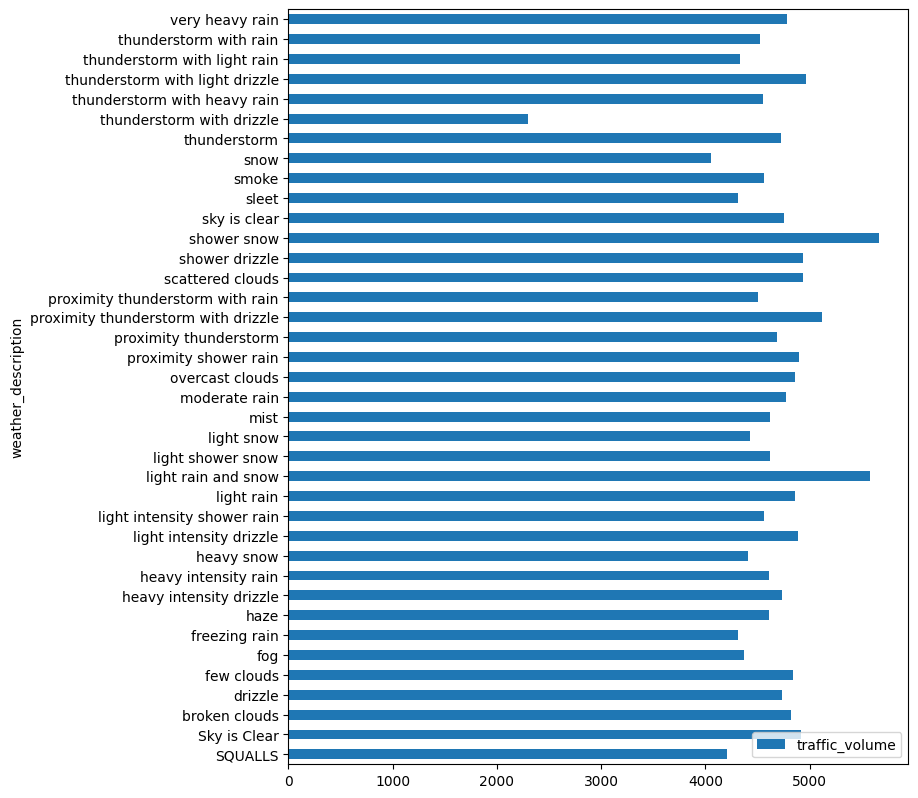

In [43]:
by_weather_description.plot.barh(y='traffic_volume', figsize=(8, 10))

From the horizontal bar plot on weather_description, there are a few conditions associated with traffic conditions above 5,000 cars, including: shower snow, proximity thunderstorm with drizzle, light rain and snow

Overall, there are not many strong weather indicators for heavy traffic. Certain conditions where precipitation is in a transient state, such as between  snow and rain, might be indicative of heavy traffic, but these conditions aren't strongly predictive. In general, the best indicators of heavy traffic were temporal, where daytime weekday traffic was usually the most congested, especially during traditional rush hour times 7 to 8am and 4 to 5pm. Additionally, time of year also played an important role, with warmer months contributing to more travel vs. colder months.